In [1]:
# importing all packages
import pandas as pd
from pandas import Series,DataFrame
 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from datetime import datetime

In [2]:
import pandas_datareader.data as web
from pandas_datareader import DataReader

In [3]:
# Will use Apple, Google, Microsoft and Amazon stock prices for analysis

tech_list = ['AAPL','GOOG','MSFT','AMZN']

In [6]:
# calculate beginning and end dates for fetching data

end = datetime.now()
start = datetime(end.year-1,end.month,end.day)
print(start)
print(end)

2018-02-01 00:00:00
2019-02-01 10:56:12.755906


In [5]:
for stock in tech_list:
    globals()[stock] = DataReader(stock,'yahoo',start,end)

In [7]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-02-01,168.619995,166.759995,167.169998,167.779999,47230800.0,165.298355
2018-02-02,166.800003,160.100006,166.000000,160.500000,86593800.0,158.126022
2018-02-05,163.880005,156.000000,159.100006,156.490005,72738500.0,154.175354
2018-02-06,163.720001,154.000000,154.830002,163.029999,68243800.0,160.618591
2018-02-07,163.399994,159.070007,163.089996,159.539993,51608600.0,157.180222


In [8]:
AMZN.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-02-01,1459.880005,1385.140015,1445.000000,1390.000000,9113800,1390.000000
2018-02-02,1498.000000,1414.000000,1477.390015,1429.949951,11125700,1429.949951
2018-02-05,1458.979980,1320.719971,1402.619995,1390.000000,11495000,1390.000000
2018-02-06,1443.989990,1351.790039,1361.459961,1442.839966,11066800,1442.839966
2018-02-07,1460.989990,1415.150024,1449.000000,1416.780029,7162700,1416.780029


In [9]:
# describe method returns summary of the data including total count of datapoints, mean, percentiles etc.
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,189.267341,185.363333,187.307143,187.317501,3.458891e+07,186.271833
std,22.506540,22.404362,22.459507,22.477634,1.516613e+07,22.516572
min,145.720001,142.000000,143.979996,142.190002,9.909581e+06,142.190002
25%,172.987495,168.525005,170.572506,169.937504,2.367740e+07,169.195141
50%,187.349998,184.845001,186.204994,185.955002,3.189075e+07,184.916672
75%,209.312500,205.632496,207.299999,207.645000,4.095045e+07,206.771034
max,233.470001,229.779999,230.779999,232.070007,9.624670e+07,231.263092


In [10]:
# info method gives information on number of columns and number of non null values in each column, memory usage etc.
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2018-02-01 to 2019-02-01
Data columns (total 6 columns):
High         252 non-null float64
Low          252 non-null float64
Open         252 non-null float64
Close        252 non-null float64
Volume       252 non-null float64
Adj Close    252 non-null float64
dtypes: float64(6)
memory usage: 13.8 KB


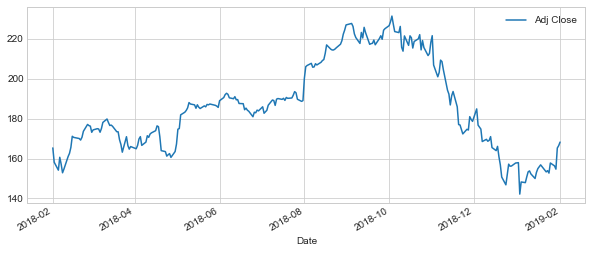

In [11]:
# plotting adjusted close against time
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

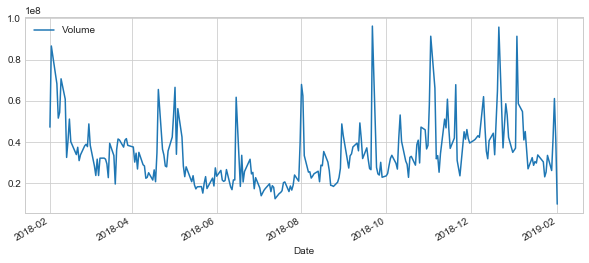

In [12]:
# Volume of stocks traded each time period
AAPL['Volume'].plot(legend=True,figsize=(10,4))

In [13]:
# moving averages

ma_day = [10,20,50]

In [15]:
for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    
    AAPL[column_name] = AAPL['Adj Close'].rolling(ma).mean() 

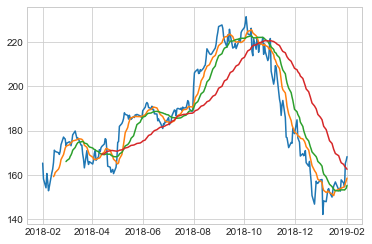

In [16]:
plt.plot(AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']])

In [17]:
# add a new column to the DataFrame for daily returns using pct_change() method

AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

In [19]:
# first 9 values for 'MA for 10 days' nulls because 10 day oving average needs 10 values
# same for other means and 'Daily Return' columns

AAPL.head(25)

,High,Low,Open,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days,Daily Return
Date,,,,,,,,,,
2018-02-01,168.619995,166.759995,167.169998,167.779999,47230800.0,165.298355,NaN,NaN,NaN,NaN
2018-02-02,166.800003,160.100006,166.000000,160.500000,86593800.0,158.126022,NaN,NaN,NaN,-0.043390
2018-02-05,163.880005,156.000000,159.100006,156.490005,72738500.0,154.175354,NaN,NaN,NaN,-0.024984
2018-02-06,163.720001,154.000000,154.830002,163.029999,68243800.0,160.618591,NaN,NaN,NaN,0.041792
2018-02-07,163.399994,159.070007,163.089996,159.539993,51608600.0,157.180222,NaN,NaN,NaN,-0.021407
2018-02-08,161.000000,155.029999,160.289993,155.149994,54390500.0,152.855148,NaN,NaN,NaN,-0.027517
2018-02-09,157.889999,150.240005,157.070007,156.410004,70672600.0,154.724808,NaN,NaN,NaN,0.012232
2018-02-12,163.889999,157.509995,158.500000,162.710007,60819500.0,160.956924,NaN,NaN,NaN,0.040279
2018-02-13,164.750000,161.649994,161.949997,164.339996,32549200.0,162.569351,NaN,NaN,NaN,0.010018


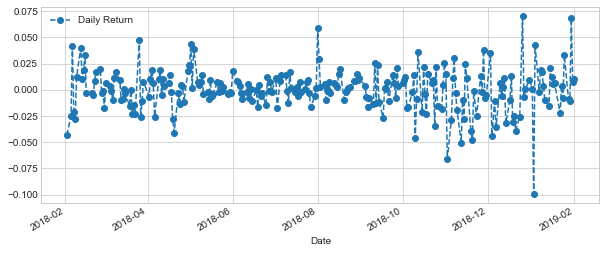

In [20]:
AAPL['Daily Return'].plot(figsize=(10,4),legend=True,linestyle='--',marker='o')

C:\Users\surabhi\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


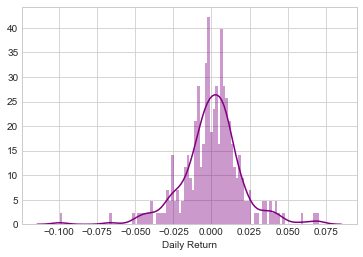

In [21]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

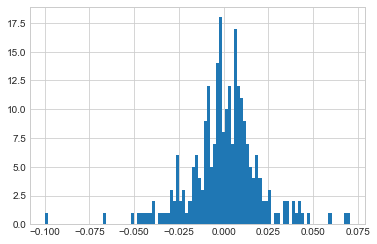

In [22]:
# Histogram with 100 bins

AAPL['Daily Return'].hist(bins=100)

In [23]:
# create another dataframe with closing values

closing_df = DataReader(tech_list,'yahoo',start,end)['Adj Close']

In [24]:
closing_df.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2018-02-01,165.298355,1390.000000,1167.699951,92.656006
2018-02-02,158.126022,1429.949951,1111.900024,90.218201
2018-02-05,154.175354,1390.000000,1055.800049,86.502533
2018-02-06,160.618591,1442.839966,1080.599976,89.775864
2018-02-07,157.180222,1416.780029,1048.579956,88.085136


In [25]:
# create yet another dataframe with percent change  of the closing values

tech_rets = closing_df.pct_change()

In [26]:
# the first record will be nulls because no data to calculate percent change

tech_rets.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2018-02-01,NaN,NaN,NaN,NaN
2018-02-02,-0.043390,0.028741,-0.047786,-0.026310
2018-02-05,-0.024984,-0.027938,-0.050454,-0.041185
2018-02-06,0.041792,0.038014,0.023489,0.037841
2018-02-07,-0.021407,-0.018062,-0.029632,-0.018833


C:\Users\surabhi\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\surabhi\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


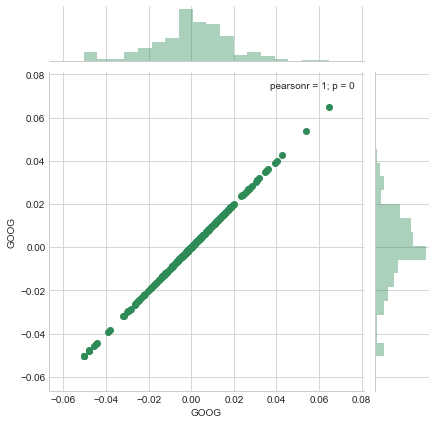

In [27]:
# Google vs Google plot :-)
sns.jointplot('GOOG','GOOG',tech_rets,kind = 'scatter',color='seagreen')

C:\Users\surabhi\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\surabhi\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


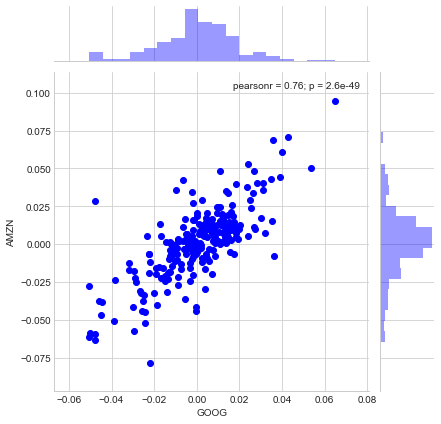

In [29]:
sns.jointplot('GOOG','AMZN',tech_rets,kind = 'scatter',color='blue')

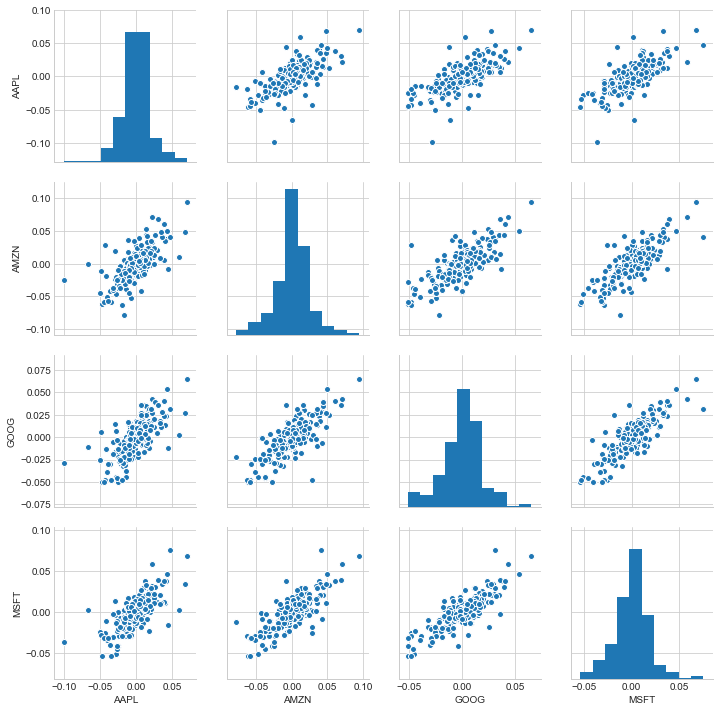

In [30]:
sns.pairplot(tech_rets.dropna())

C:\Users\surabhi\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
C:\Users\surabhi\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
C:\Users\surabhi\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
C:\Users\surabhi\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
C:\Users\surabhi\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
C:\Users\surabhi\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


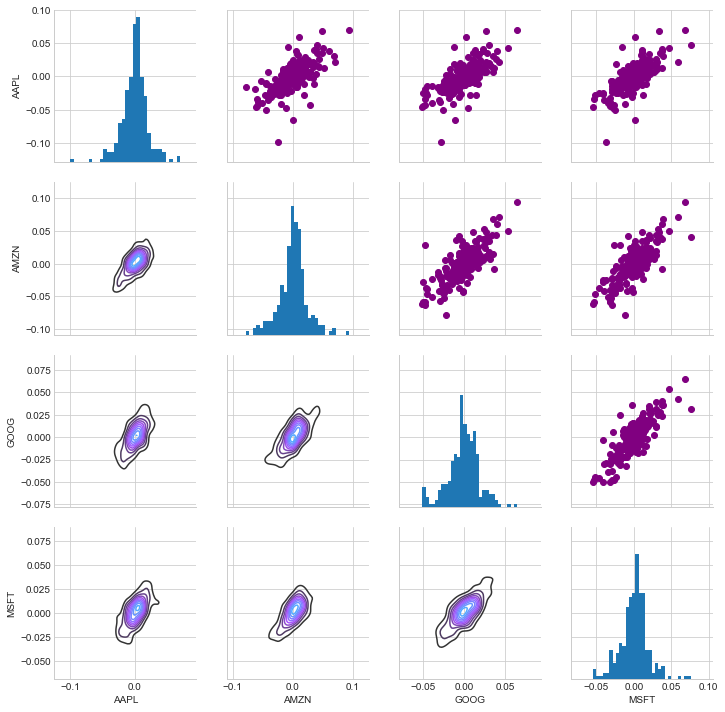

In [31]:
returns_fig = sns.PairGrid(tech_rets.dropna())

#map upper triangle
returns_fig.map_upper(plt.scatter,color='purple')  

# map lower triangle

returns_fig.map_lower(sns.kdeplot, cmap='cool_d')

# diagonal

returns_fig.map_diag(plt.hist,bins=30)

C:\Users\surabhi\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
C:\Users\surabhi\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
C:\Users\surabhi\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
C:\Users\surabhi\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
C:\Users\surabhi\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
C:\Users\surabhi\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


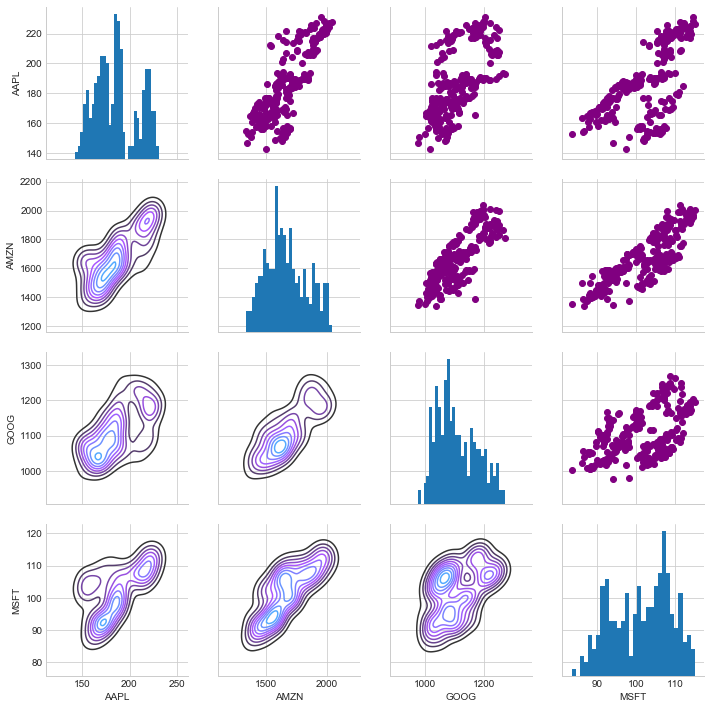

In [32]:
returns_fig = sns.PairGrid(closing_df.dropna())

#map upper triangle
returns_fig.map_upper(plt.scatter,color='purple')  

# map lower triangle

returns_fig.map_lower(sns.kdeplot, cmap='cool_d')

# diagonal

returns_fig.map_diag(plt.hist,bins=30)


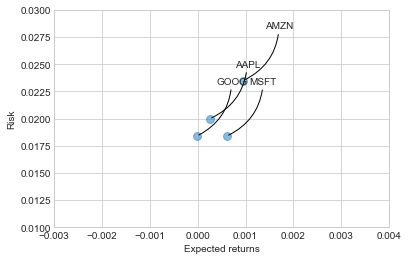

In [33]:
# Define a new DataFrame as a clenaed version of the oriignal tech_rets DataFrame
rets = tech_rets.dropna()

area = np.pi*20

plt.scatter(rets.mean(), rets.std(),alpha = 0.5,s =area)

# Set the x and y limits of the plot (optional, remove this if you don't see anything in your plot)
plt.ylim([0.01,0.03])
plt.xlim([-0.003,0.004])

#Set the plot axis titles
plt.xlabel('Expected returns')
plt.ylabel('Risk')

# Label the scatter plots, for more info on how this is done, chekc out the link below
# http://matplotlib.org/users/annotations_guide.html
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

C:\Users\surabhi\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


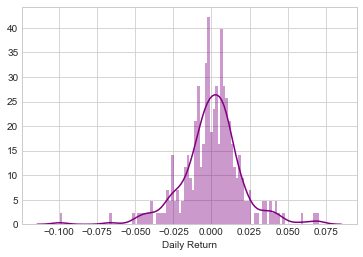

In [34]:
# value at risk - bootstrap method
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

In [35]:
rets['AAPL'].quantile(0.05)

-0.03159469020707206

In [36]:
rets['AAPL'].quantile(0.03)

-0.040302170760227296

In [37]:
# value at risk - Montecarlo method

days = 365

dt = 1/days

mu = rets.mean()['GOOG']

sigma = rets.std()['GOOG']

In [38]:
def stock_monte_carlo(start_price, days, mu, sigma):
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    for x in range(1,days):
        shock[x] = np.random.normal(loc=mu*dt,scale= sigma*np.sqrt(dt))
        
        drift[x] = mu * dt
        
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
    return price

In [39]:
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-02-01,1174.000000,1157.520020,1162.609985,1167.699951,2412100,1167.699951
2018-02-02,1123.069946,1107.277954,1122.000000,1111.900024,4857900,1111.900024
2018-02-05,1110.000000,1052.030029,1090.599976,1055.800049,3798300,1055.800049
2018-02-06,1081.709961,1023.137024,1027.180054,1080.599976,3448000,1080.599976
2018-02-07,1081.780029,1048.260010,1081.540039,1048.579956,2369200,1048.579956


Text(0.5,1,'MonteCarlo Analysis for GOOGLE')

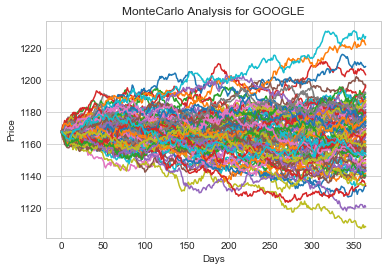

In [40]:
start_price = 1167.82

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('MonteCarlo Analysis for GOOGLE')

In [41]:
runs = 10000

simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price, days, mu, sigma)[days-1]

In [42]:
q = np.percentile(simulations,1)

In [43]:
q

1118.0091751141658

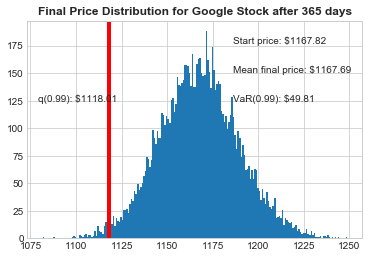

In [44]:
plt.hist(simulations,bins=200)
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)

# mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" %simulations.mean())

# variance of the price
plt.figtext(0.6,0.6, "VaR(0.99): $%.2f" %(start_price - q))

# display 1% quantile
plt.figtext(0.15,0.6, "q(0.99): $%.2f" %q)

# plot a line at the 1% quantile result

plt.axvline(x=q, linewidth=4, color='r')

#title

plt.title("Final Price Distribution for Google Stock after %s days" %days, weight='bold');
